Analyse exploratoire des données sur les passagers du Titanic

Partie 1: Analyser et résumer des ensembles de données (EDA)
- Analyse des caractéristiques
- Trouver des tendances en fonction de plusieurs caractéristiques

Partie 2: Ingénierie des fonctionnalités et nettoyage des données :
- Ajouter de fonctionnalités
- Retirer les fonctionnalités redondantes
- Conversion de fonctionnalités sous un format adapté à la modélisation

Partie 1:Exploratory of Data Analysis (EDA)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline


In [3]:
data = pd.read_csv('train.csv') #importation du fichier csv
data.head() #verification si le fichier est bien téléchargé

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isnull().sum() #verifie si il y a des elements manquants dans les colonnes et en fait la somme

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Combien de survivant au nauvrage

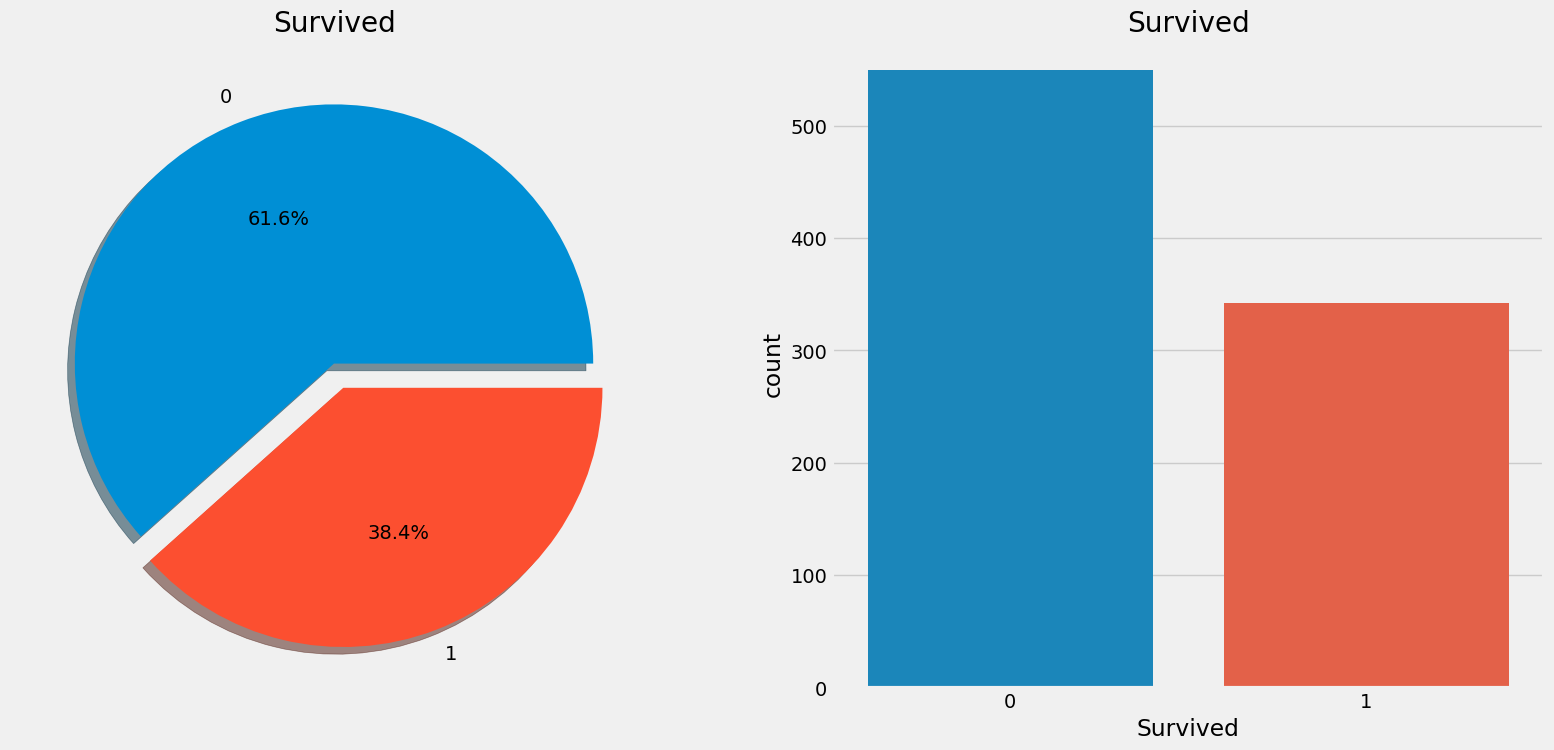

In [65]:
f,ax=plt.subplots(1,2,figsize=(18,8)) #figure orienté objet
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(data=data, x='Survived', ax=ax[1])
ax[1].set_title('Survived')
plt.show()

On observe que seulement 38,4 % de la population sur le Titanic a survécue au naufrage.

)Analyse des caractéristiques

In [24]:
data.groupby(['Sex','Survived'])['Survived'].count() #Ici on a trié le nombre de survivants en fonction de leurs sex.

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

On remarque que sur environ 300 femmes 233 ont survécues contrairement aux hommes où pour environ 500 hommes seulement 109 ont survévus.

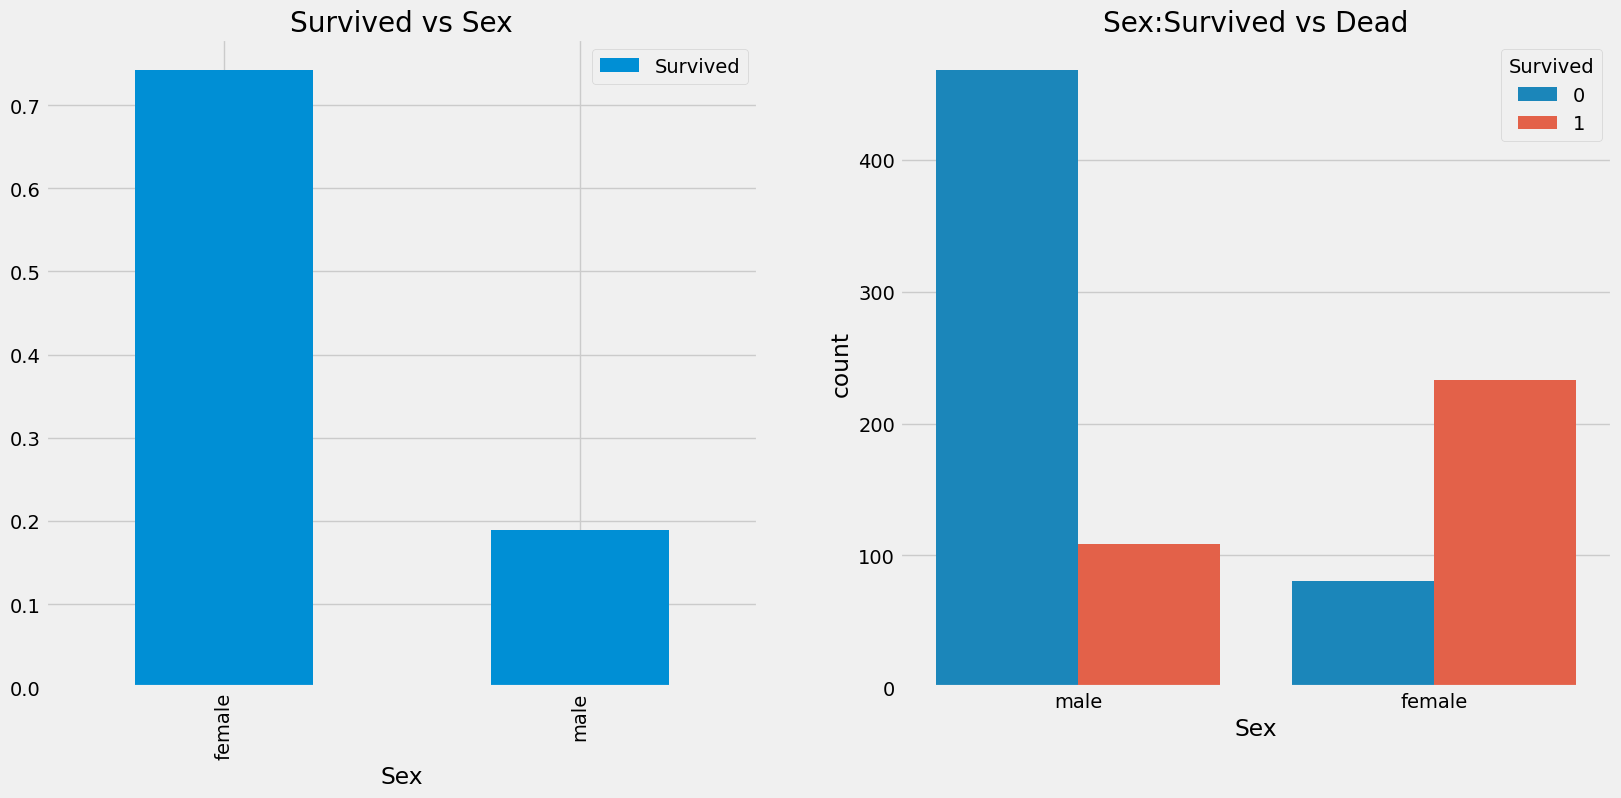

In [67]:
f,ax=plt.subplots(1,2,figsize=(18,8)) #figure orienté objet
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(data=data, x='Sex', hue='Survived', ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()



On observe le poucentage de survivant suivant le sex des passagers

In [26]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r') 
#la fonction crosstab donne une meilleur vue de l'ensemble des données, ici la donnée des survivants

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Dans le graphique si-dessus on peut étudier le nombre de personnes ayant survécues suivant si elles étaient en première, deuxième ou troisième classe.

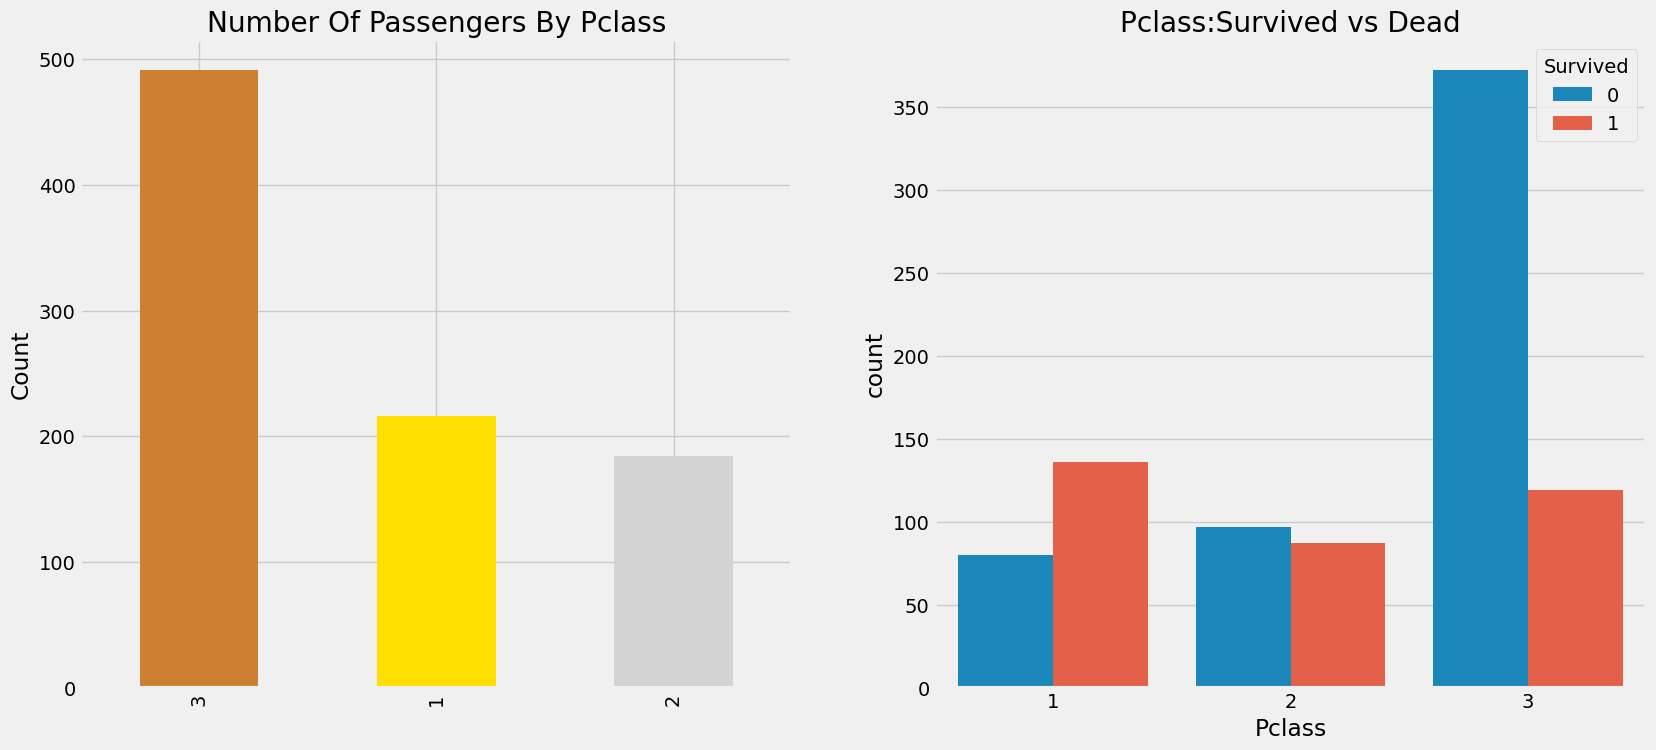

In [68]:
f,ax=plt.subplots(1,2,figsize=(18,8)) #figure orienté objet
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0]) # compte et trie les personnes suivant leurs classes
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(data=data, x='Pclass',hue='Survived', ax=ax[1]) #compte et trie les personnes suivant leurs classes et si elles ont survécu
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()



Apparemment l'argent ne peut pas tout acheter, mais on observe que la proportion de personne en première classe ayant survécue et nettement supérieur à la proportion de personne en troisième classe ayant survécue( 63% contre, 25%) .

In [35]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')
#Meilleur vue d'ensemble des données des personnes ayant survécu suivant leurs sex et leurs ages

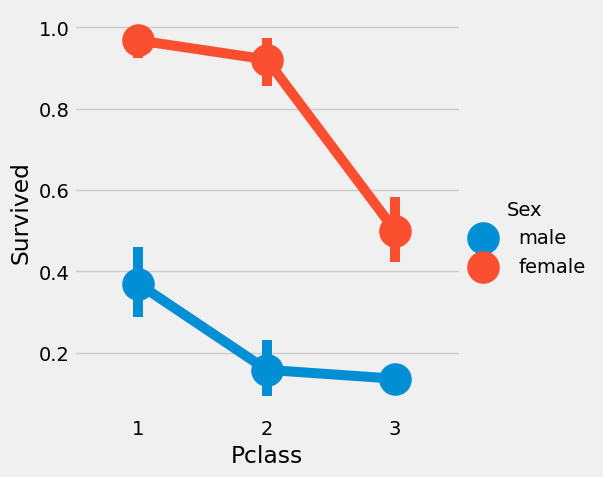

In [39]:
sns.catplot(data= data, x= 'Pclass', y = 'Survived' , hue = 'Sex', kind = 'point')
plt.show()
#graphique en point suivant la classe, le sex, et si les personnes ont survécues

En regardant le tableau et les courbes du graphique au dessus, on observe qu'une femme de la première classe avait plus de 90% de chance de survivre contrairement à une femme de la troisième classe qui avait 50% d echance de survivre.

In [43]:
print('Oldest Passenger was of:',data['Age'].max(),'Years') # On peut savoir qui était la personne la plus agée en utilisant la fonction .max dans la donnée Age
print('Youngest Passenger was of:',data['Age'].min(),'Years') # On  peut savoir qui était la personne la plus jeune
print('Average Age on the ship:',data['Age'].mean(),'Years') # On obtient la moyenne d'âge de la population du titanic



Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


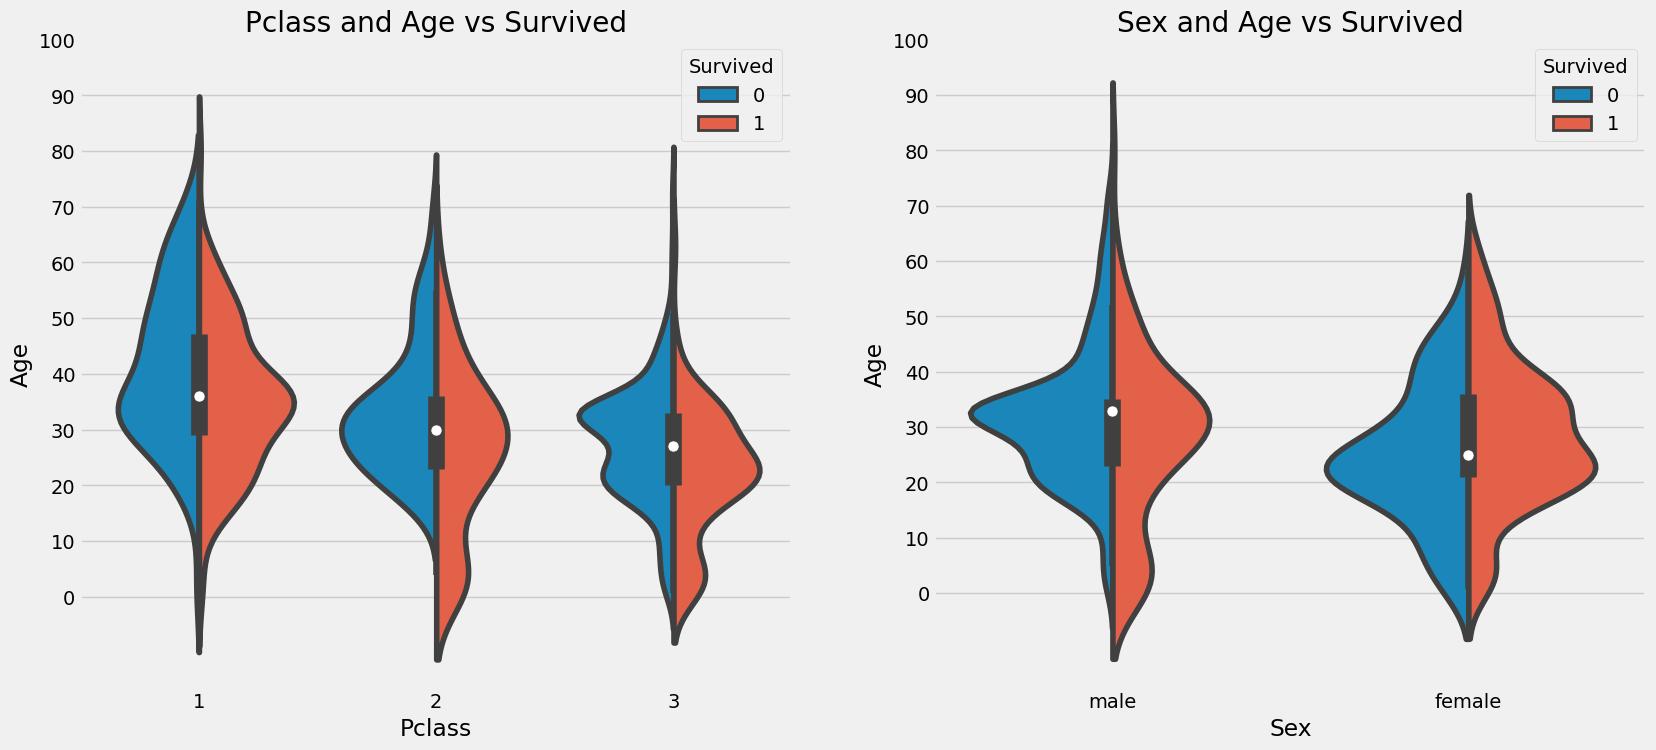

In [70]:
f,ax=plt.subplots(1,2,figsize=(18,8)) #figure orienté objet
sns.violinplot(data=data, x="Pclass",y="Age", hue="Survived", split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(data=data, x="Sex", y="Age", hue="Survived", split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

on observe que:
- C'est un graphique où l'on peux observer la distribution de données avec une boite à moustache intégré.

- les 2 extrémités du rectangle noir au milieu de chaques graphiques représentes le 1er et 3eme quartil le point blanc au milieu représente la médiane.

- Le taux d'enfants n'ayant pas survécus est faible qu'importe la classe.

- Les chances de survie diminuent avec l'augmentation de l'âge chez les hommes.

In [4]:
data['Initial']=0
for i in data: #boucle permettant de trier l'appelation des passagers
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


On a trié les passagers suivant leurs appelations (mr, mme, lady, capitain, maitre) et suivant leurs sex.

In [49]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

On a encore remplacé les appelations des passagers par des catégories plus générales (mr, mme).

In [50]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [51]:
data.Age.isnull().any()

False

On a vérifié si des valeurs nulles étaient encore présentes.

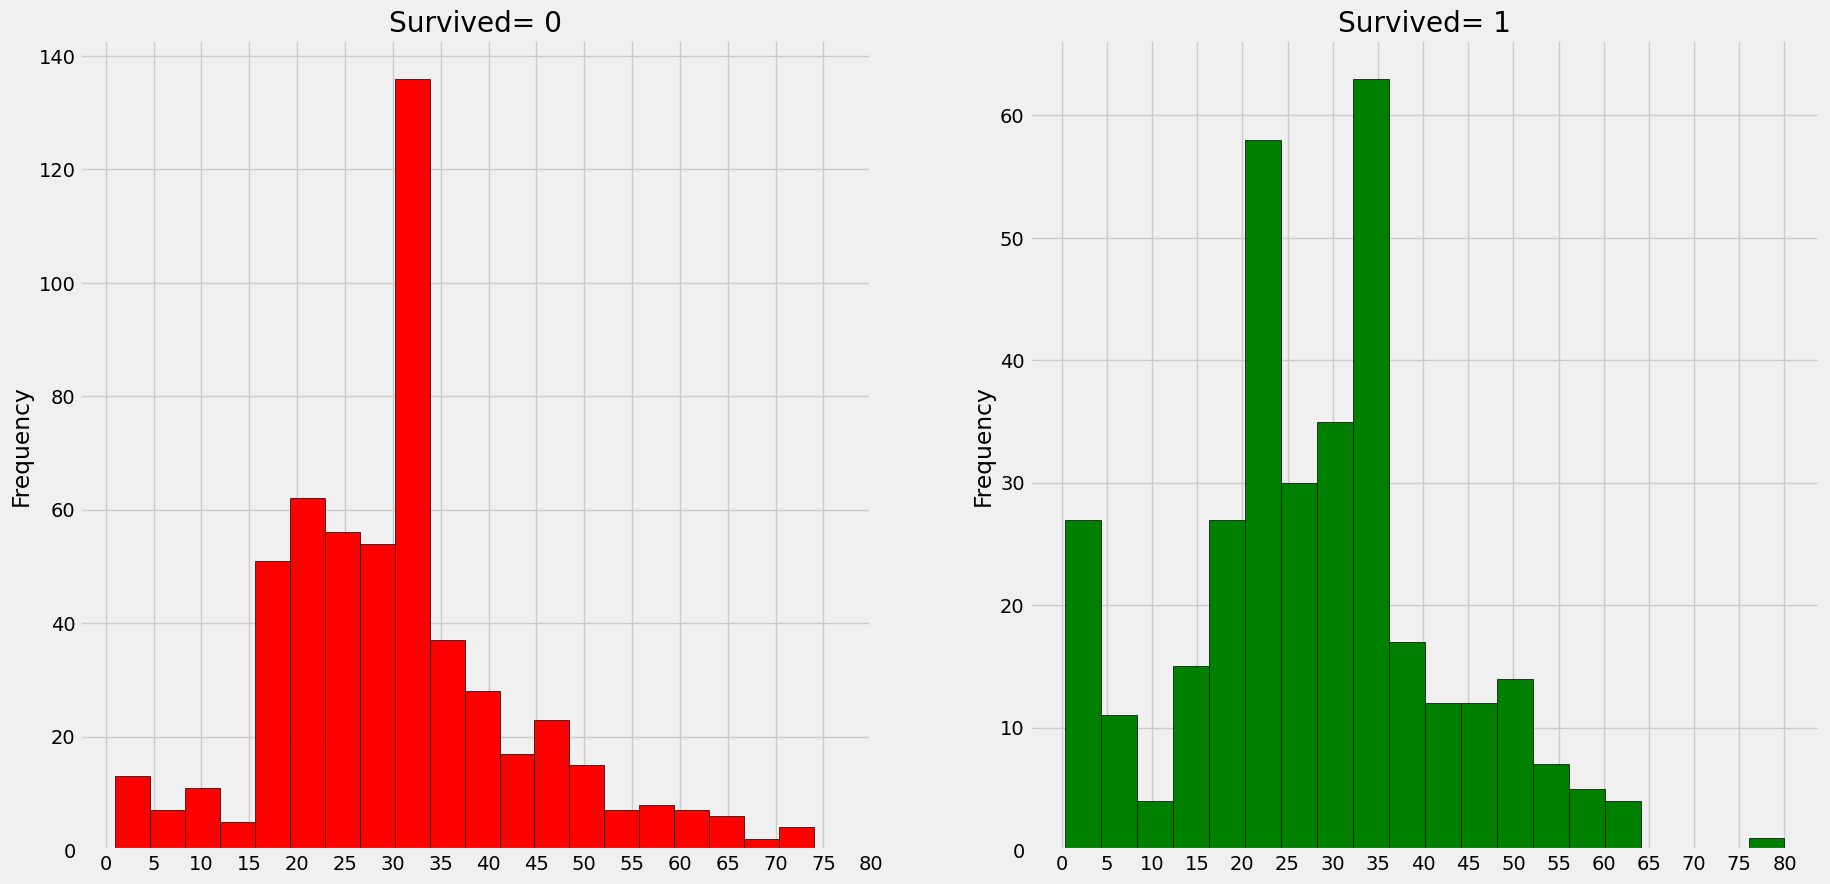

In [52]:
f,ax=plt.subplots(1,2,figsize=(20,10)) #figure orienté objet
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

Le premier graphique (rouge) est celui des personnes n'ayant pas survécues, l'autre graphique (vert) est celui des personnes ayant survécues.
- La personne la plus agée a survécu.
- Une grande majorité des enfants de moins de 5 a survécue.
- les personnes ayant entre 35 et 40 ans ont plus survécues que les personnes de 30 à 35ans.

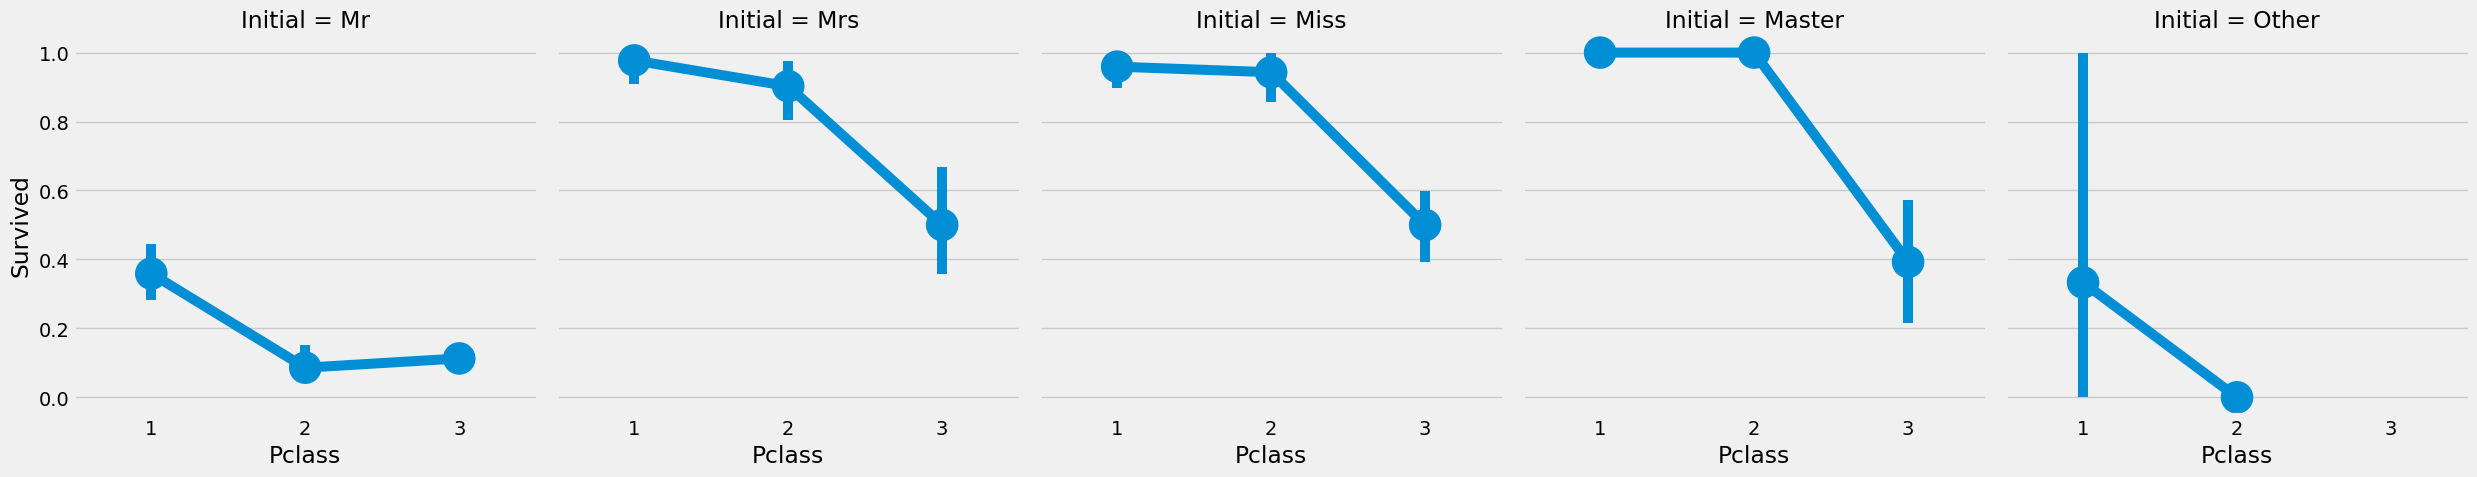

In [57]:
sns.catplot(data=data, x='Pclass', y='Survived', col='Initial', kind='point')
plt.show()

Les femmes et les enfants d'abord !

In [58]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

On observe les chances de survie suivant le sex et la porte d'embarquement prise.

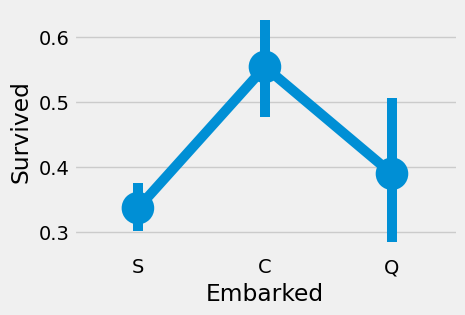

In [59]:
sns.catplot(data=data, x='Embarked', y='Survived', kind='point')
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

Les chances de survie étaient plus élevées pour les passagers ayant embarqués porte C.

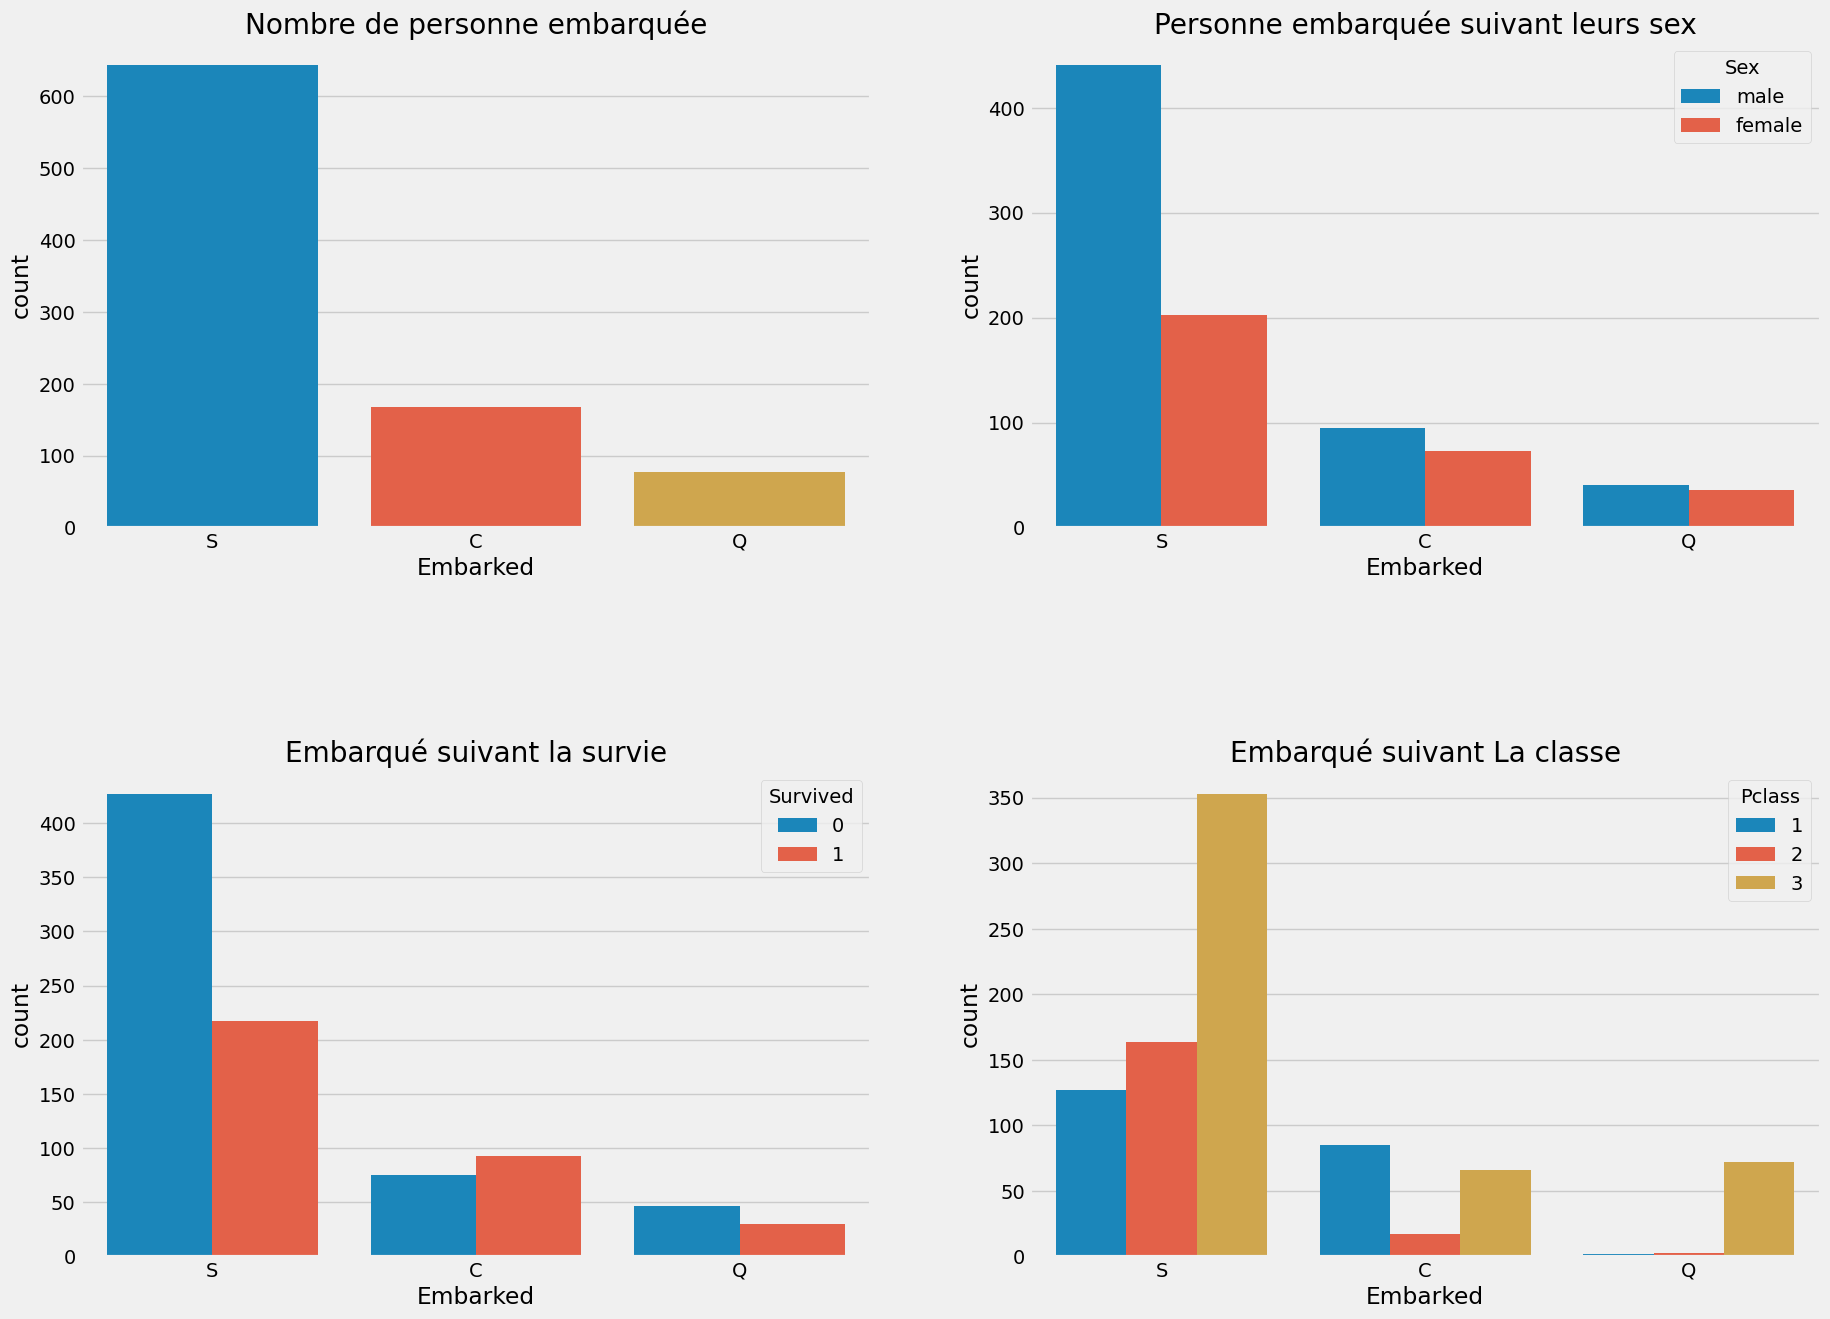

In [6]:
f,ax=plt.subplots(2,2,figsize=(20,15)) #figure orienté objet
sns.countplot(data=data, x='Embarked',ax=ax[0,0]) #1er tableau
ax[0,0].set_title('Nombre de personne embarquée')
sns.countplot(data=data, x='Embarked', hue='Sex', ax=ax[0,1]) #2 eme tableau
ax[0,1].set_title('Personne embarquée suivant leurs sex')
sns.countplot(data=data, x='Embarked',hue='Survived', ax=ax[1,0]) #3eme tableau
ax[1,0].set_title('Embarqué suivant la survie')
sns.countplot(data=data, x='Embarked', hue='Pclass', ax=ax[1,1]) # 4eme tableau
ax[1,1].set_title('Embarqué suivant La classe')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()
#tout les tableau sont dans la même figure

Observations :

- Les personnes ayant embarquées par la porte S étaient majoritairements de la 3eme classe.

- Les passagers de la porte C ont une proportion de personnes ayant survécues plus importante que de personnes n'ayant pas survécues, contrairement aux autres portes d'embarquements.

- Les personnes ayant embarquées porte Q sont quasiment tous de la 1er classe.

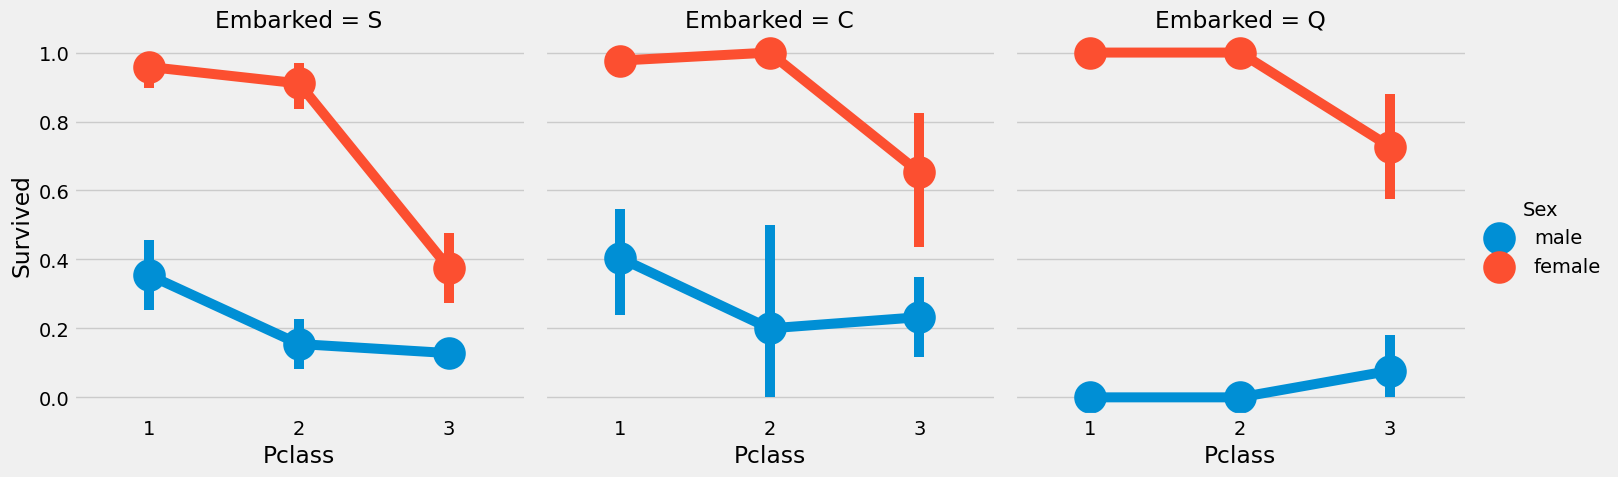

In [75]:
sns.catplot(data=data, x='Pclass', y='Survived',hue='Sex',col='Embarked', kind='point')
plt.show()

Observations :

- Les femmes de la 1er et 2eme classe on quasiment un taux de survi de 1 quelque soit la porte d'embarquement.

- Le taux de survi des personnes de la 3eme classe ayant embarquées porte S est très faible quelque soit le sex.

- Très peu d'hommes ont survécus en embarquant porte Q 



Comme nous avons vu que la majorité de passagers embarquait depuis la porte S, nous remplaçons NaN par S.

In [77]:
data['Embarked'].fillna('S',inplace=True)
data.Embarked.isnull().any()

False

Cette caractéristique représente si une personne est seule ou avec les membres de sa famille.

In [78]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


/home/leguibs/workspace/py-sql/.venv/lib/python3.8/site-packages/seaborn/categorical.py:3024: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)


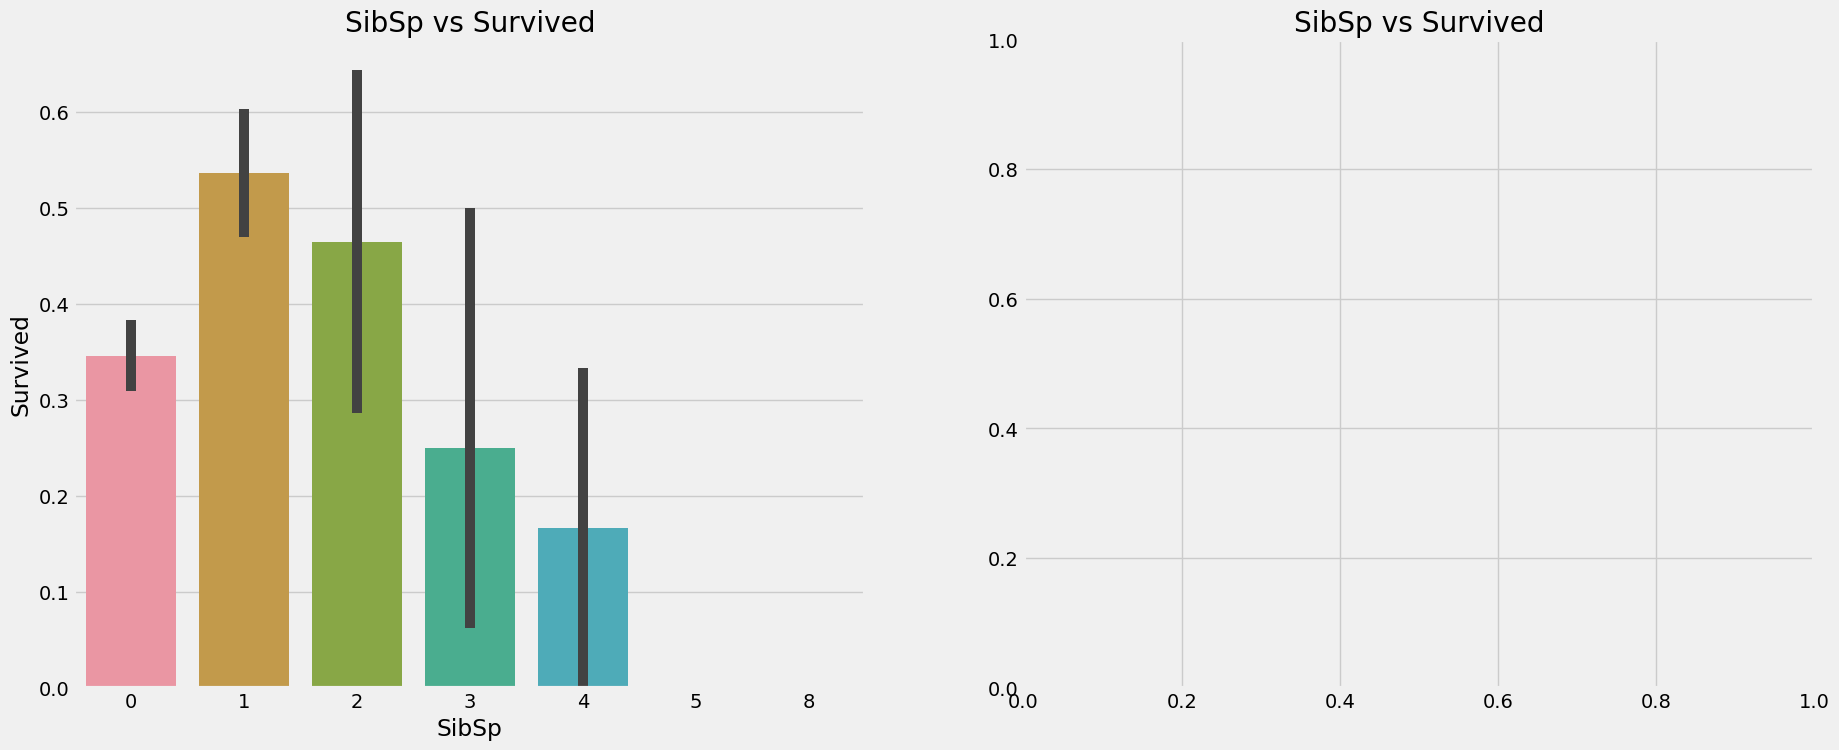

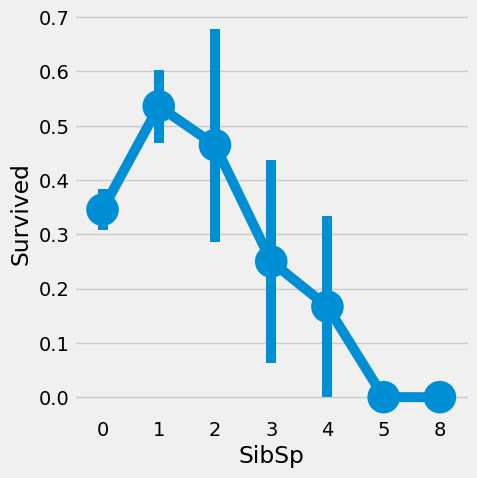

In [8]:
f,ax=plt.subplots(1,2,figsize=(20,8)) #figure orienté objet
sns.barplot(data=data, x='SibSp', y='Survived',ax=ax[0]) #1er tableau en Barres
ax[0].set_title('SibSp vs Survived')
sns.catplot(data=data, x='SibSp', y='Survived', ax=ax[1], kind='point') # 2eme tableau en point
ax[1].set_title('SibSp vs Survived')
plt.show()

In [92]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


Observations :

Le barplot et le catplot montrent que si un passager est seul à bord sans frère ou sœur, il a un taux de survi de 34,5 %. Plus la famille est nombreuse moins les chances de survie sont grandes. Mais si on a une seule personne dans sa famille alors les chances de survie sont plus grandes que pour les personnes seules.

In [93]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


Ce tableau si-dessus nous montre que les familles nombreuses étaient principalement issus de la 3eme classe

/home/leguibs/workspace/py-sql/.venv/lib/python3.8/site-packages/seaborn/categorical.py:3024: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)


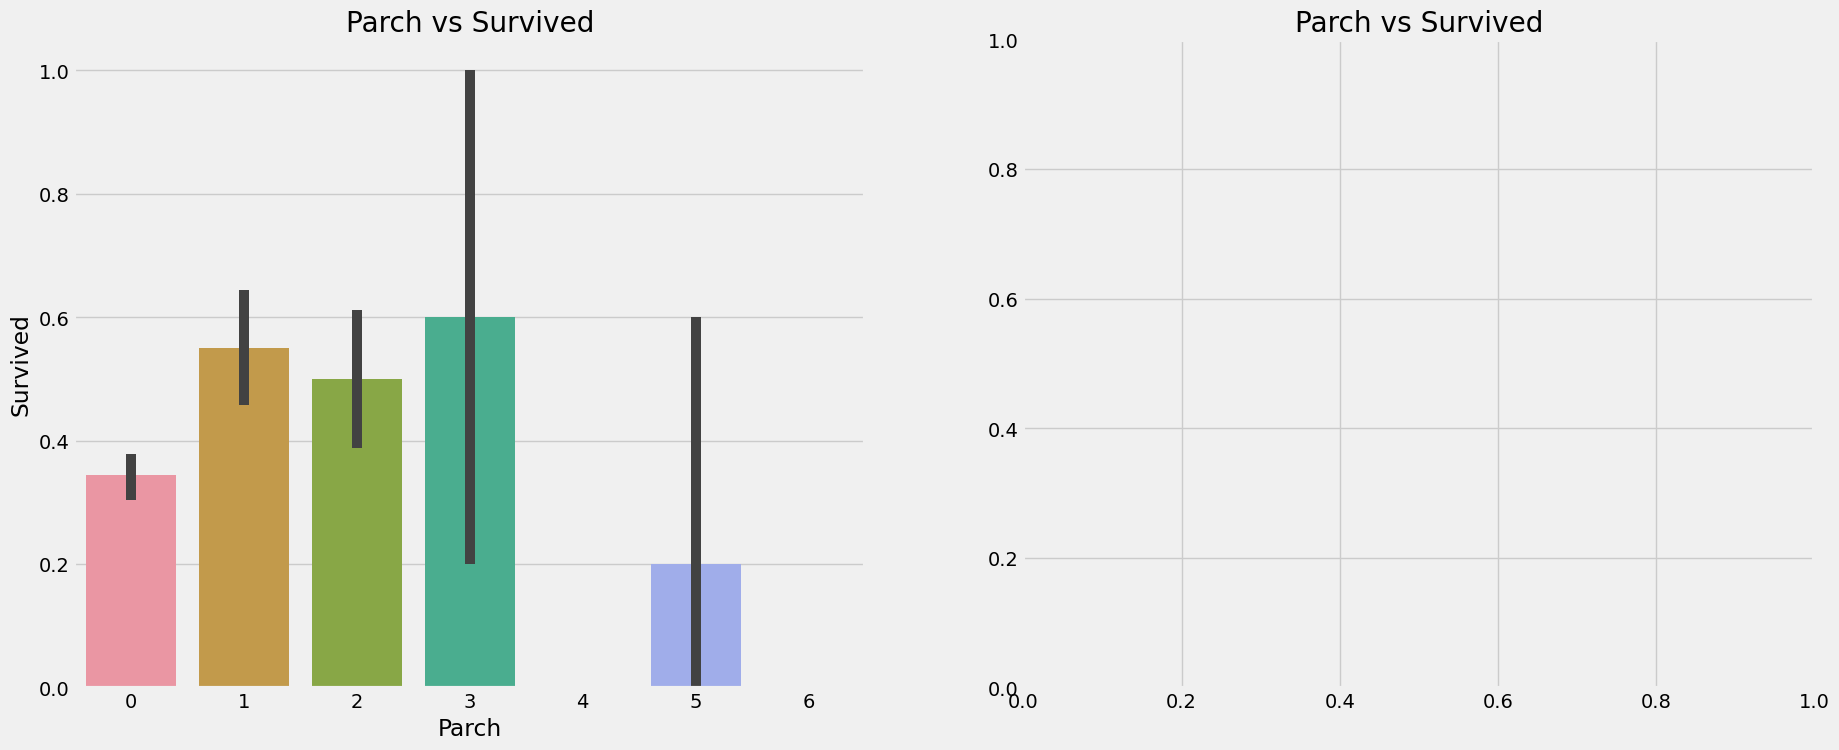

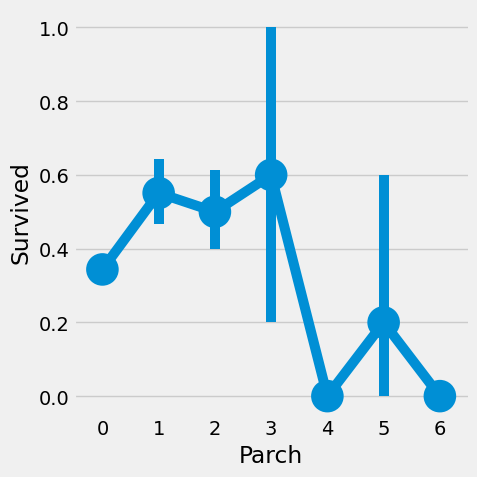

In [115]:
f,ax=plt.subplots(1,2,figsize=(20,8)) #figure orienté objet
sns.barplot(data=data, x='Parch',y='Survived', ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.catplot(data=data, x='Parch',y='Survived', kind='point', ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.show()

Observations :

- Les passagers avec leurs parents à bord ont plus de chances de survie. Il diminue à mesure que le nombre augmente.

- Les chances de survie sont bonnes pour quelqu'un qui a 1 à 3 parents sur le navire. Être seul réduit les chances de survie, les chances de survie diminuent lorsque quelqu'un a plus de 4 parents sur le navire.



In [95]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


le tarif le plus bas et de 0

/tmp/ipykernel_307/3812364604.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
/tmp/ipykernel_307/3812364604.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
/tmp/ipykernel_307/3812364604.py:6: UserWarning: 

`di

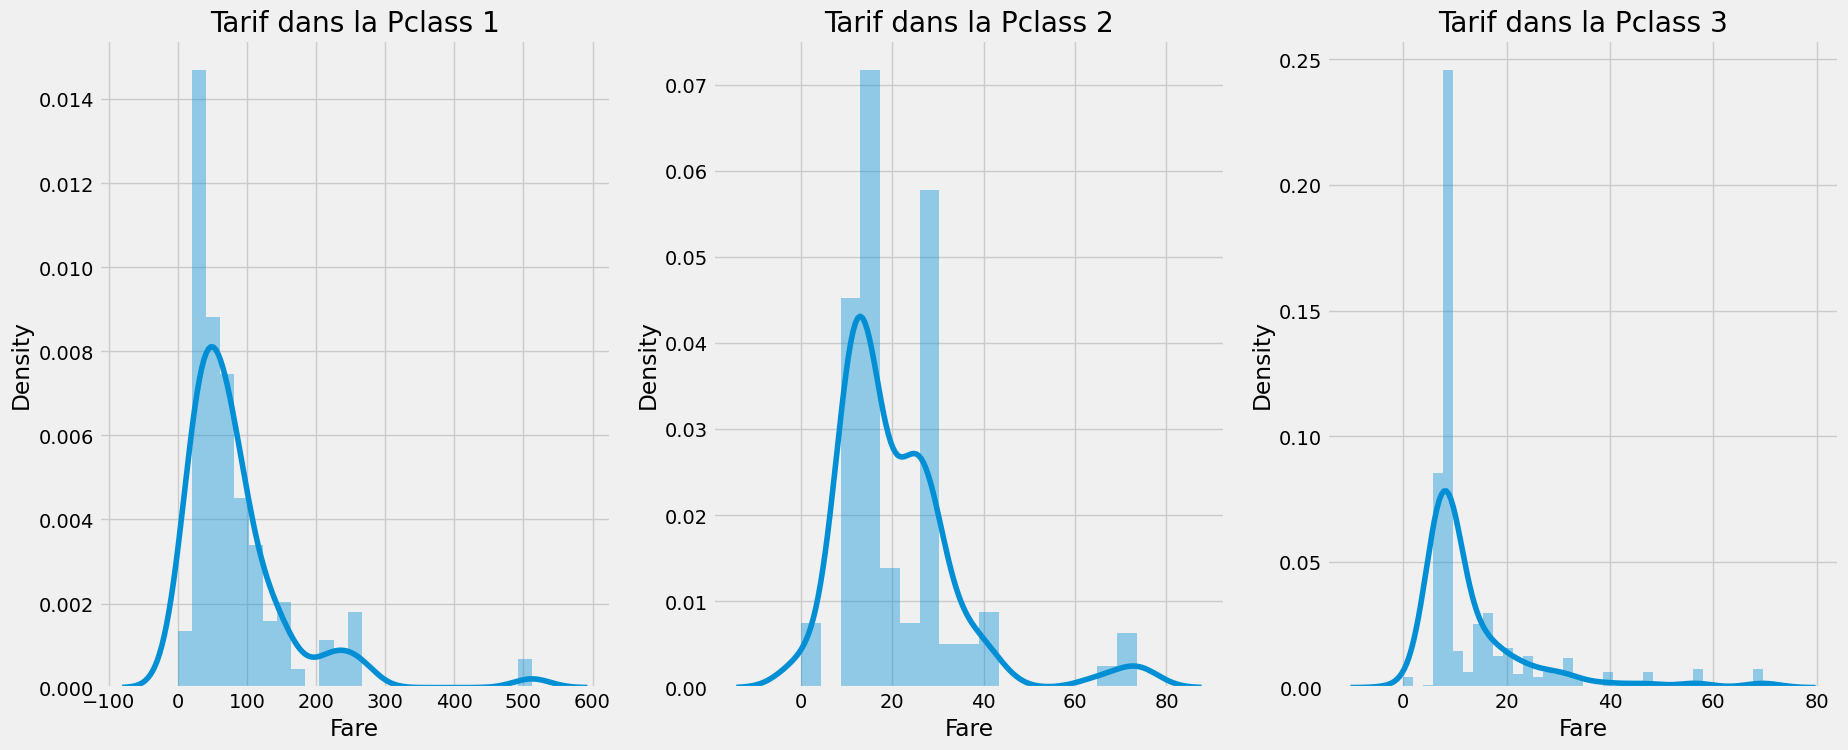

In [9]:
f,ax=plt.subplots(1,3,figsize=(20,8)) 
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Tarif dans la Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Tarif dans la Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Tarif dans la Pclass 3')
plt.show()

On observe que la distribution des tarifs varie suivant les classes.

Récapitulatif des observations:

- Sexe : Les chances de survie des femmes sont plus élevées que celles des hommes.

- Pclass :Les chances de survie dans la 1er classe est sont bien plus élevées que celles de la 3 eme classe.
Le taux de survi de la 3eme classe est très faible. Pour les femmes de la 1ere classes les chances de survie sont quasiment de 1, pour les femmes de la 2eme classe les chances de survie sont très élevées aussi. Parcontre les femmes de la 3ème on nettement moins de chances de survie. L'argent donc permets de plus grandes chances de survie.

- Âge : Les enfants de moins de 10ans ont de grandes chances de survie. Les personnes agées de 15 à 35ans ont moins de chances de survie.

- Embarqué : Les chances de survie de la porte C sont assez élevées, alors que les personnes de la 1er classe ont embarquées porte S.

- Famille : Avoir 1 à 2 frères et sœurs, un conjoint à bord ou 1 à 3 parents permets de plus grandes chances de survie.
Être seul ou avoir une famille nombreuse réduit de beaucoup les chances de survie.

Corrélation entre les caractéristiques

/tmp/ipykernel_353/262375774.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix


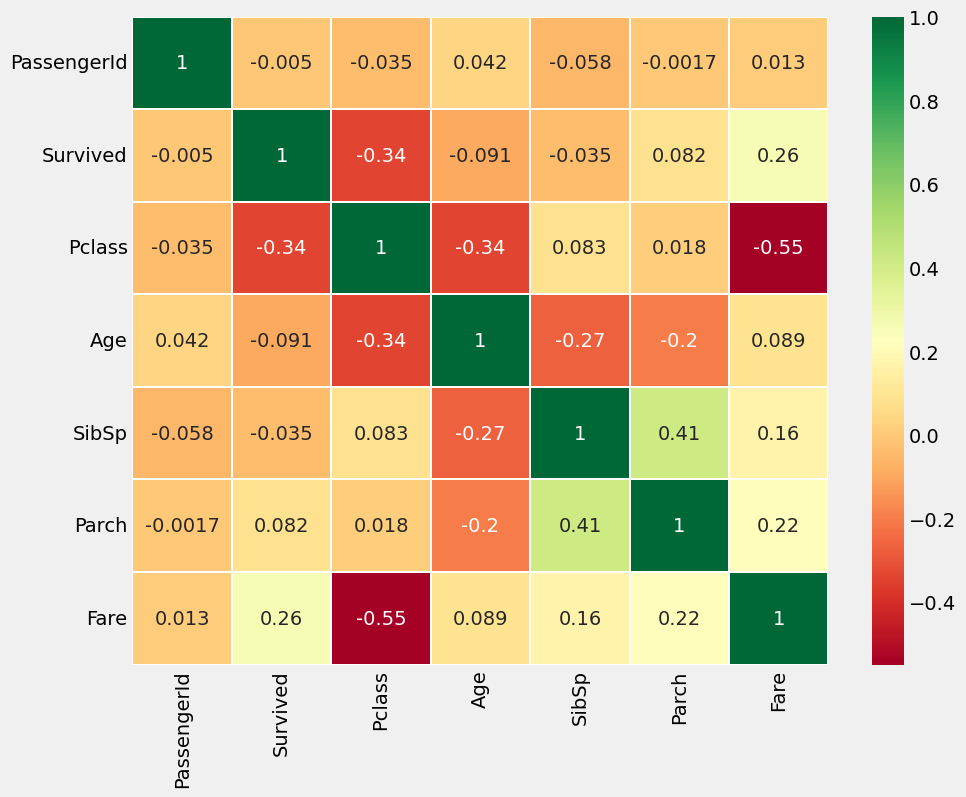

In [97]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()



Interpréter la Heatmap:

- Seules les caractéristiques numériques sont comparées.

- CORRÉLATION POSITIVE : Si une augmentation de la caractéristique A entraîne une augmentation de la caractéristique B, alors elles sont positivement corrélées. Une valeur 1 signifie une corrélation positive parfaite.

- CORRÉLATION NÉGATIVE : Si une augmentation de la caractéristique A entraîne une diminution de la caractéristique B, alors elles sont négativement corrélées. Une valeur -1 signifie une corrélation négative parfaite.

- Disons maintenant que deux caractéristiques sont hautement ou parfaitement corrélées, de sorte que l'augmentation de l'une entraîne une augmentation de l'autre. Cela signifie que les deux entités contiennent des informations très similaires et qu'il y a très peu ou pas de variance dans les informations. Ceci est connu sous le nom de MultiColinéarité car les deux contiennent presque les mêmes informations.
- A partir de la carte thermique ci-dessus, nous pouvons voir que les fonctionnalités ne sont pas très corrélées. La corrélation la plus élevée est entre SibSp et Parch soit 0,41. Nous pouvons donc continuer avec toutes les fonctionnalités.

Partie 2)

)Ajout de fonctionnalités

Nous allons catégoriser les ages par une valeur compris entre 0 et 5

In [116]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


Ensuite nous allons observer le nombre de passagers dans leurs categories d'ages

In [117]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


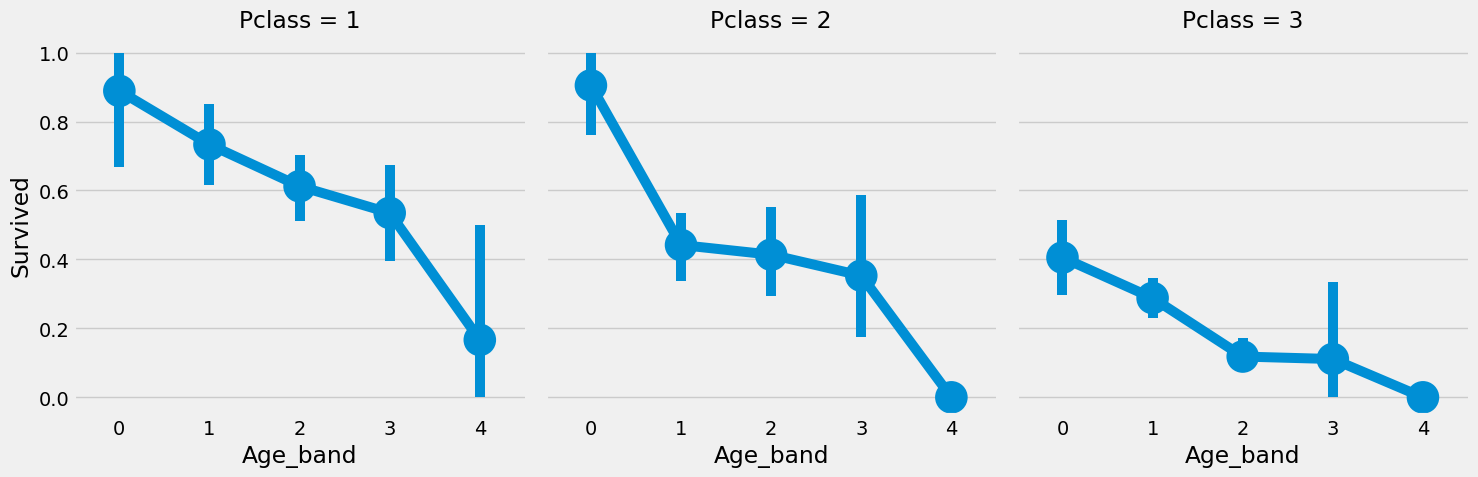

In [119]:
sns.catplot(data=data, x='Age_band', y='Survived', col='Pclass', kind='point')
plt.show()

On observe donc que plus les passagers étaient vieux, plus leurs espérance de survie étaient faible, et ce quelques soient leurs classes.

Nous pouvons créer une fonctionnalité "Family_size" et "Alone". Cette caractéristique est la somme de Parch et SibSp. Cela nous donne des données combinées afin que nous puissions vérifier si le taux de survi a quelque chose à voir avec la taille de la famille des passagers. Alone indiquera si un passager est seul ou non.

/home/leguibs/workspace/py-sql/.venv/lib/python3.8/site-packages/seaborn/categorical.py:3024: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)
/home/leguibs/workspace/py-sql/.venv/lib/python3.8/site-packages/seaborn/categorical.py:3024: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)


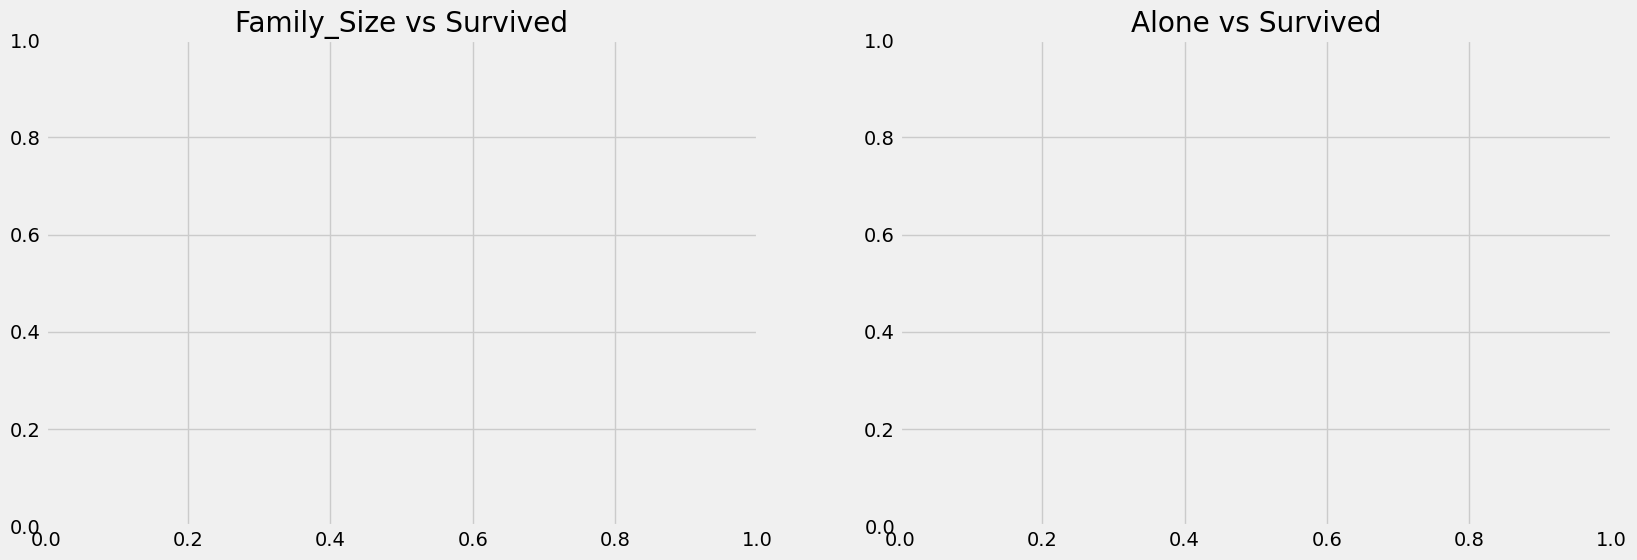

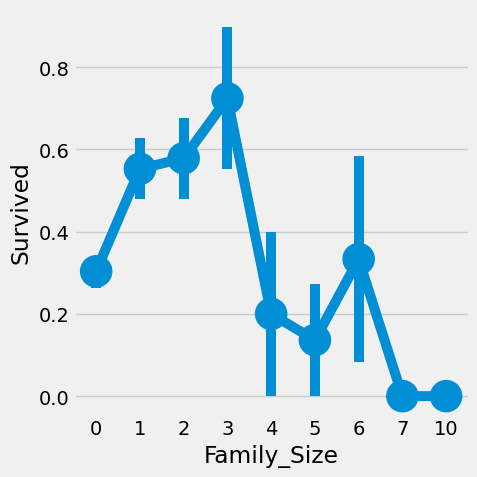

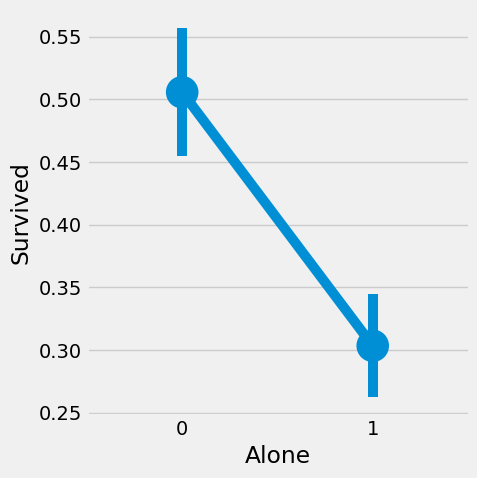

In [10]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.catplot(data=data, x='Family_Size', y='Survived',ax=ax[0], kind='point')
ax[0].set_title('Family_Size vs Survived')
sns.catplot(data=data, x='Alone', y='Survived',ax=ax[1], kind='point')
ax[1].set_title('Alone vs Survived')
plt.show()

Family_Size=0 signifie que le passager est seul. De toute évidence, si vous êtes seul ou que family_size=0, alors les chances de survie sont très faibles. Pour la taille de la famille > 4, les chances diminuent également. Cela semble également être une caractéristique importante pour le modèle. Examinons cela plus avant.

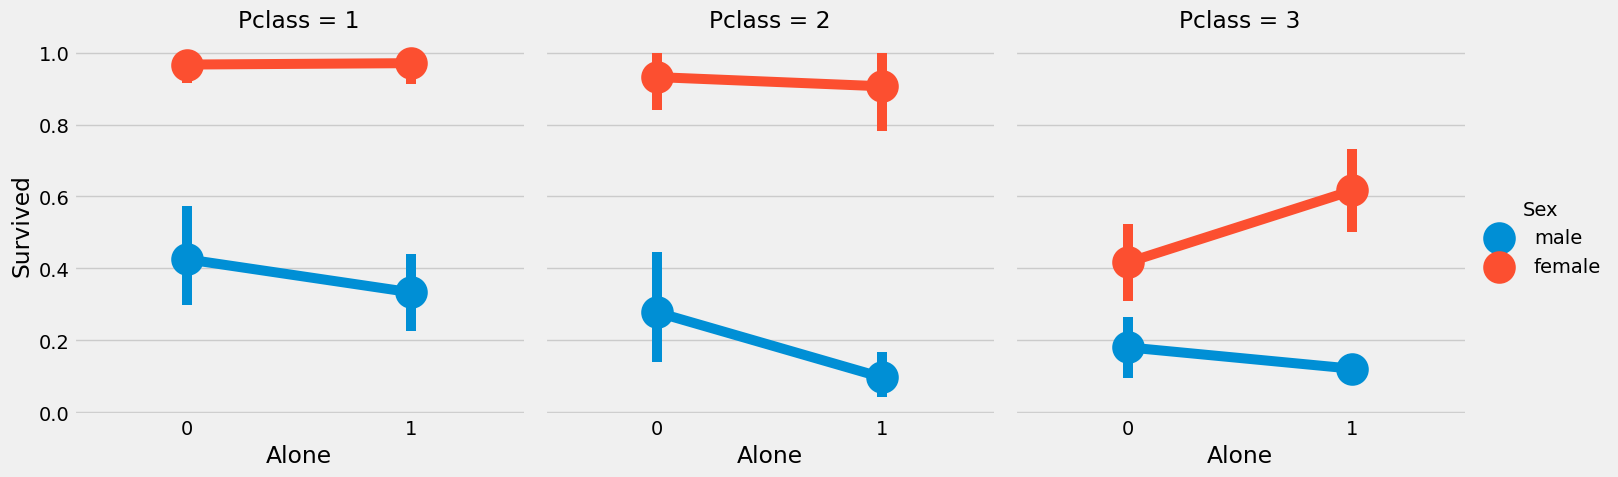

In [125]:
sns.catplot(data=data, x='Alone', y='Survived', hue='Sex', col='Pclass', kind='point')
plt.show()

Il est visible qu'être seul est négatif quel que soit le sexe ou la classe sauf pour la 3eme classe où les chances des femmes qui sont seules sont plus élevées que celles qui ont de la famille.

Étant donné que le tarif est également une caractéristique continue, nous devons le convertir en valeur ordinale. Pour cela, nous utiliserons pandas.qcut.

Donc, ce que fait qcut, c'est qu'il divise ou organise les valeurs en fonction du nombre de bacs que nous avons passés. Donc, si nous passons pour 5 bacs, les valeurs seront espacées de manière égale en 5 bacs ou plages de valeurs distincts.

In [126]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


Comme on l'a vu plus haut on observe que plus le tarif est élevé plus les chances de survie sont élevées aussi.

Maintenant, nous ne pouvons pas transmettre les valeurs Fare_Range telles quelles. Nous devrions le convertir en valeurs singleton comme nous l'avons fait dans Age_Band

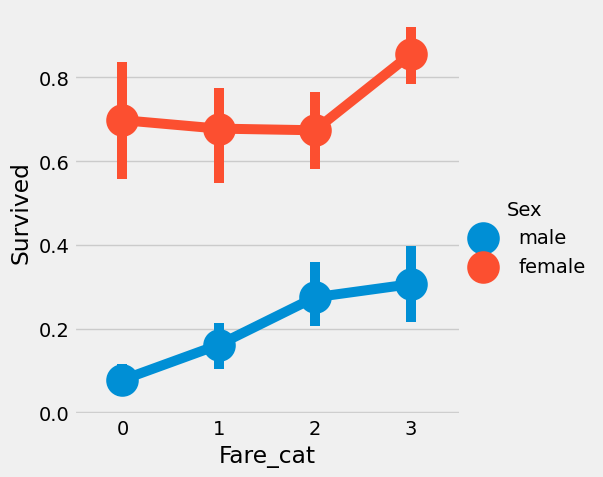

In [127]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

sns.catplot(data=data, x='Fare_cat', y='Survived',hue='Sex', kind='point')
plt.show()



Au fur est à mesure que le tarif augmente les chances de survie augmente.

On doit convertir certaines caractéristiques en valeurs numérique pour faire certaines corrélations.

In [128]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

- Nom : On ne peut pas convertir les noms en valeur numérique.

- Age: Nous avons déja la fonctionnalité Age_band. 

- Ticket : comme nom on ne peut pas la catégoriser.

- fare(tarif), Fare_range : Nous avons la fonctionnalité Fare_cat.

- Cabine : Beaucoup de valeurs NaN et aussi de nombreux passagers ont plusieurs cabines. C'est donc inutile.

- PassengerId : Ne peut pas être catégorisé.

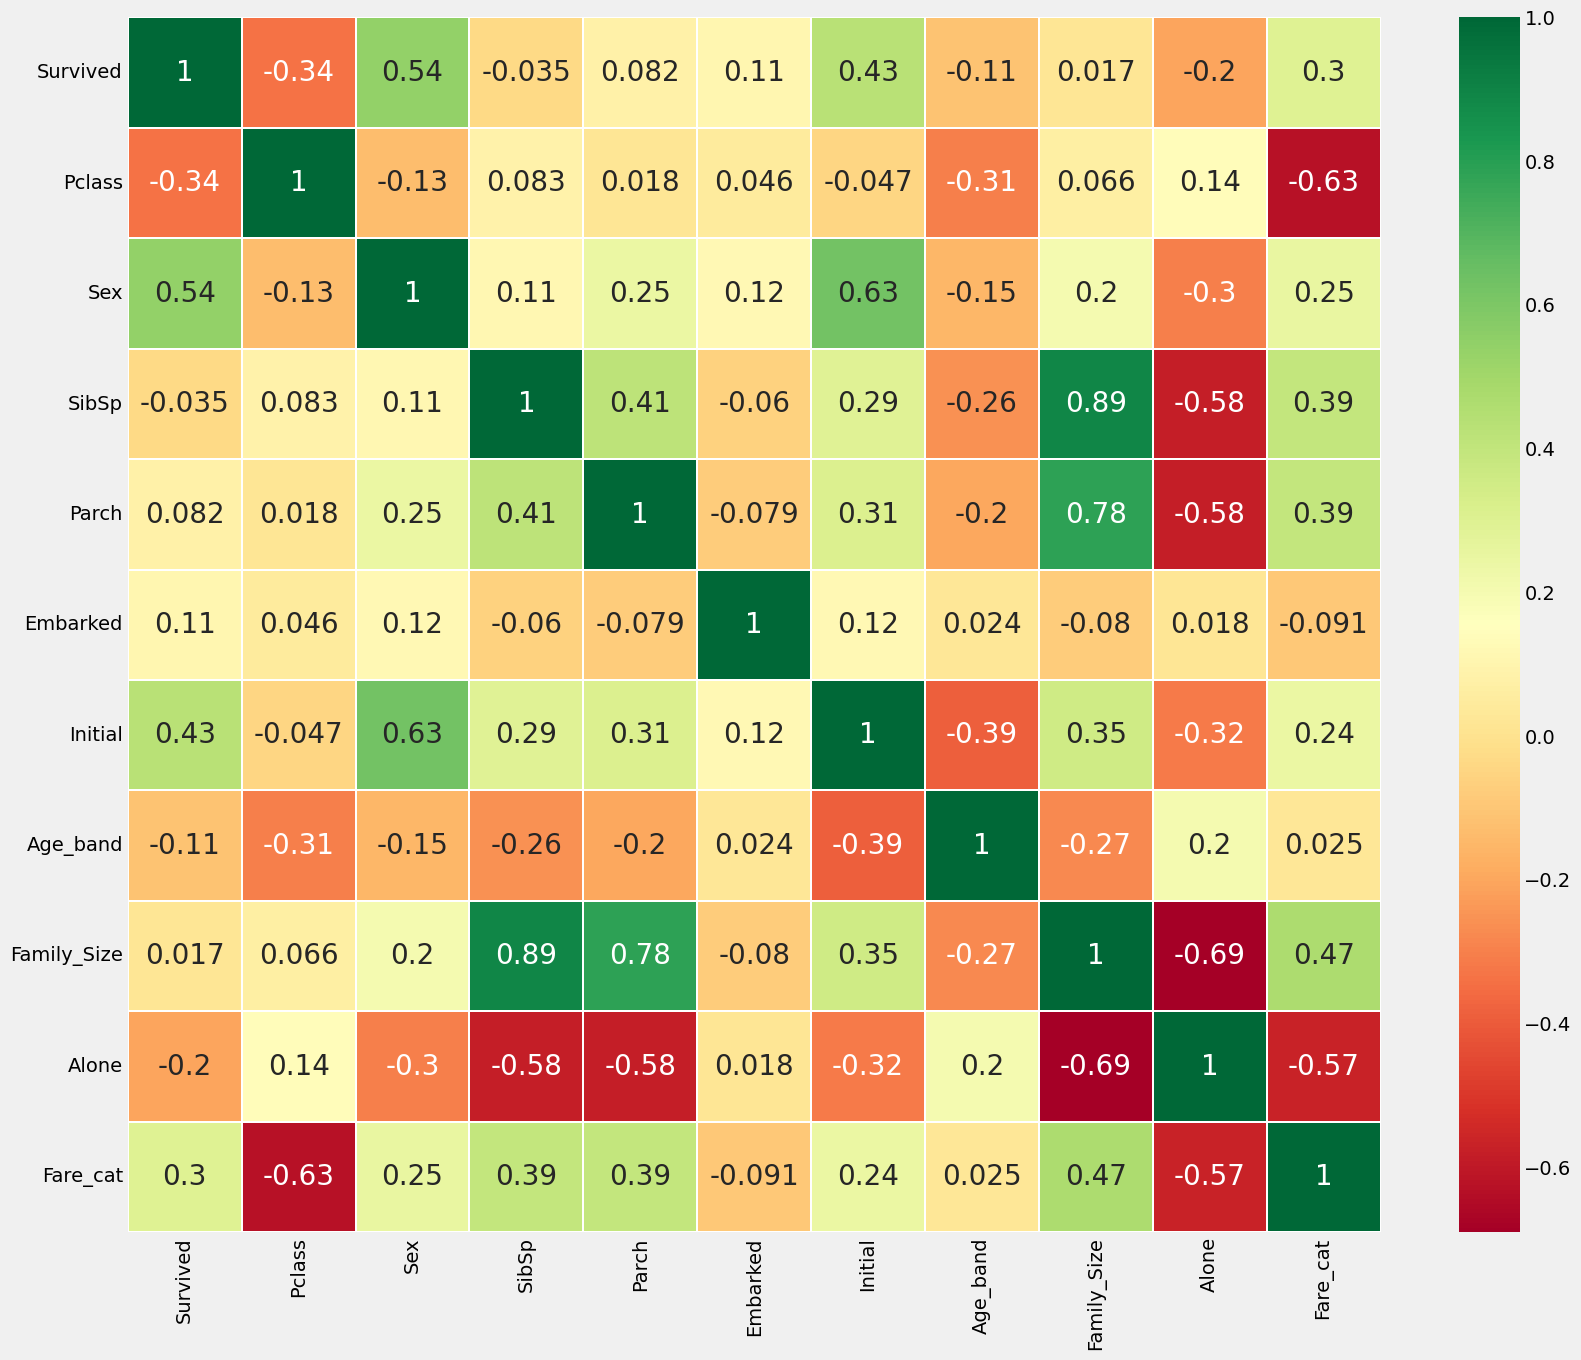

In [129]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Grâce à ce graphique de corrélation ci-dessus, on peut voir que certaines caractéristiques sont positivement liées.
Certaines d'entre eux sont négatives comme Alone et Family_Size.